## Bike Sharing Demand

In [10]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

### train_df 확인
* datetime : 연-월-일-시-분-초
* season : 1=spring, 2=summer, 3=fall, 4=winter
* holiday : 0=공휴일이 아닌 날, 1=공휴일인 날
* wokingday : 0=공휴일이거나 주말인 날, 1=(공휴일 and 주말)이 아닌 날
* weather :
    * 1=맑음, 약간 구름
    * 2=구름 낀
    * 3=약간 눈 또는 비
    * 4=강한 비 또는 눈
* temp : 섭씨
* atemp : 체감온도
* humidity : 상대습도
* windspeed : 풍속
* casual : 등록안한 사람의 대여 횟수
* registered : 등록한 사람의 대여 횟수
* count : 총 대여 횟수(casual + registered)

In [11]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:>

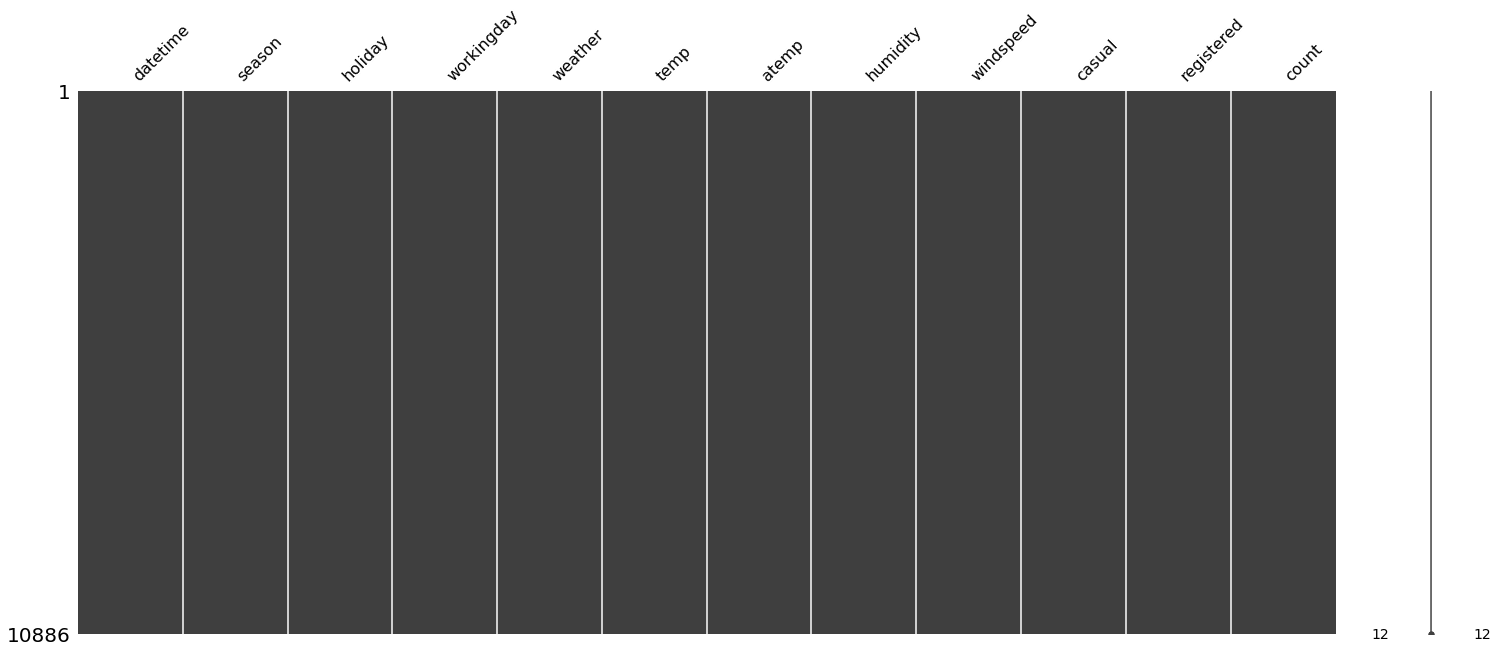

In [13]:
import missingno
missingno.matrix(train_df)

### test_df 확인

* datetime : 연-월-일-시-분-초
* season : 1=spring, 2=summer, 3=fall, 4=winter
* holiday : 0=공휴일이 아닌 날, 1=공휴일인 날
* wokingday : 0=공휴일이거나 주말인 날, 1=(공휴일 and 주말)이 아닌 날
* weather :
    * 1=맑음, 약간 구름
    * 2=구름 낀
    * 3=약간 눈 또는 비
    * 4=강한 비 또는 눈
* temp : 섭씨
* atemp : 체감온도
* humidity : 상대습도
* windspeed : 풍속

In [14]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


<AxesSubplot:>

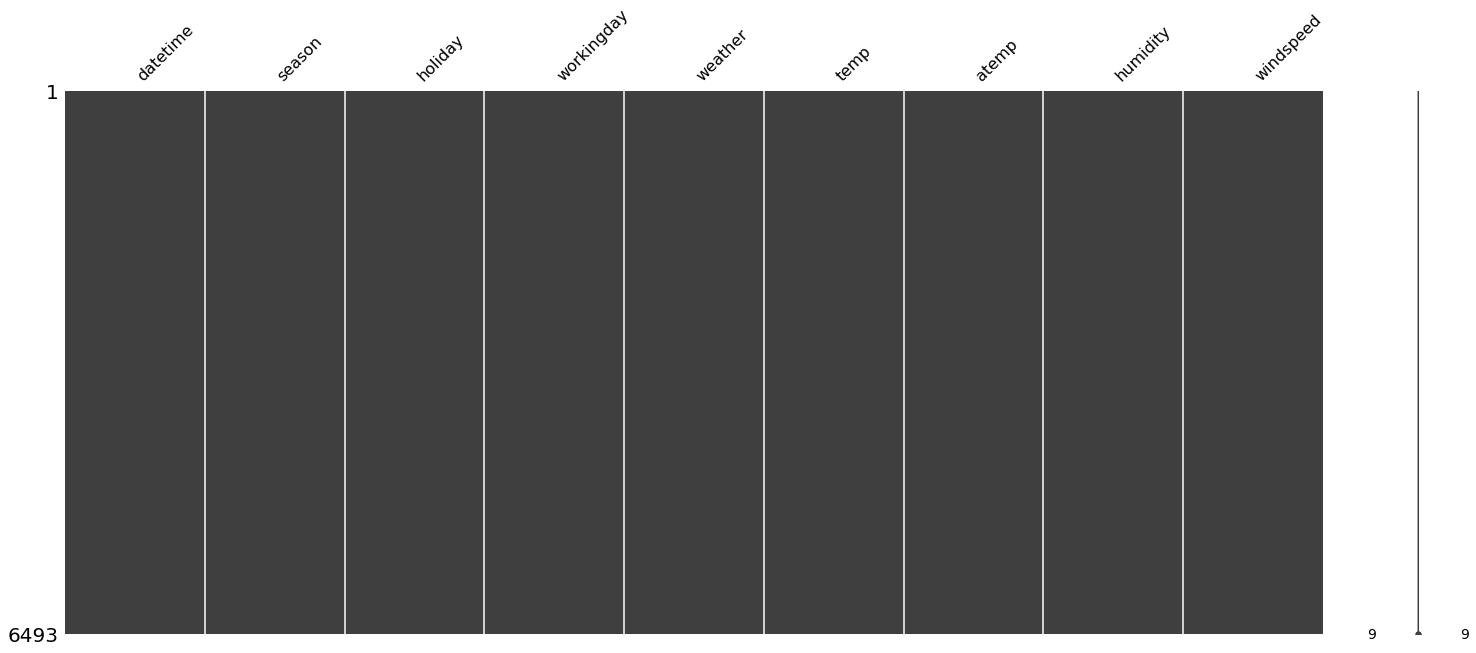

In [15]:
missingno.matrix(test_df)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### Data 변환

#### Data 결합

In [16]:
train_df.shape

(10886, 12)

In [17]:
all_df = pd.concat((train_df, test_df)).reset_index(drop = True)
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [18]:
# 데이터 분리 위치
train_df = all_df[:10886]
test_df = all_df[10886:]
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10886,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
10887,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
10888,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
10889,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
10890,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN


#### Datetime 분리

In [19]:
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN


In [20]:
all_df['date'] = dt.date
all_df['year'] = dt.year
all_df['month'] = dt.month
all_df['day'] = dt.day
all_df['hour'] = dt.hour
all_df['dow'] = dt.dayofweek
all_df['woy'] = dt.weekofyear
all_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  year        17379 non-null  int64  
 14  month       17379 non-null  int64  
 15  day         17379 non-null  int64  
 16  hour        17379 non-null  int64  
 17  dow         17379 non-null  int64  
 18  woy         17379 non-null  int

/var/folders/mc/dq2kv5b10qjd6sq35tn_rvph0000gn/T/ipykernel_78611/2003039922.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  all_df['woy'] = dt.weekofyear


#### RMSLE 성능 평가를 위한 target 값 column 변환

In [21]:
import numpy as np

all_df['casual_log'] = np.log(all_df['casual'] + 1)
all_df['registered_log'] = np.log(all_df['registered'] + 1)
all_df['count_log'] = np.log(all_df['count'] + 1)

all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,dow,woy,casual_log,registered_log,count_log
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,...,2011-01-01,2011,1,1,0,5,52,1.386294,2.639057,2.833213
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,...,2011-01-01,2011,1,1,1,5,52,2.197225,3.496508,3.713572
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,...,2011-01-01,2011,1,1,2,5,52,1.791759,3.332205,3.496508
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,...,2011-01-01,2011,1,1,3,5,52,1.386294,2.397895,2.639057
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,...,2011-01-01,2011,1,1,4,5,52,0.000000,0.693147,0.693147


#### Data 저장

In [22]:
train_df = all_df[:10886]
test_df = all_df[10886:]
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,dow,woy,casual_log,registered_log,count_log
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-20 00:00:00,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,...,2011-01-20,2011,1,20,0,3,3,NaN,NaN,NaN
2011-01-20 01:00:00,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,...,2011-01-20,2011,1,20,1,3,3,NaN,NaN,NaN
2011-01-20 02:00:00,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,...,2011-01-20,2011,1,20,2,3,3,NaN,NaN,NaN
2011-01-20 03:00:00,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,...,2011-01-20,2011,1,20,3,3,3,NaN,NaN,NaN
2011-01-20 04:00:00,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,...,2011-01-20,2011,1,20,4,3,3,NaN,NaN,NaN


In [23]:
train_df.to_csv("data/train.csv", mode='w')
test_df.to_csv("data/test.csv", mode='w')

In [1]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")

In [7]:
from sklearn.model_selection import train_test_split
ml_cols = ['season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dow', 'woy']
X_train, X_test, y_train, y_test = train_test_split(train_df[ml_cols], train_df['count_log'], test_size=0.2,
                                                    shuffle=True, random_state=0)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R2 Score : {0:.4f}".format(r2_score(y_test, preds)))

R2 Score : 0.4929


## EDA

In [1]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
all_df = pd.concat((train_df, test_df)).reset_index(drop = True)
all_df = all_df.drop("datetime.1", axis=1)
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)
train_df = all_df[:10886]
test_df = all_df[10886:]
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,dow,woy,casual_log,registered_log,count_log
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,...,2011-01-01,2011,1,1,0,5,52,1.386294,2.639057,2.833213
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,...,2011-01-01,2011,1,1,1,5,52,2.197225,3.496508,3.713572
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,...,2011-01-01,2011,1,1,2,5,52,1.791759,3.332205,3.496508
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,...,2011-01-01,2011,1,1,3,5,52,1.386294,2.397895,2.639057
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,...,2011-01-01,2011,1,1,4,5,52,0.000000,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,...,2012-12-19,2012,12,19,19,2,51,2.079442,5.799093,5.820083
2012-12-19 20:00:00,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,...,2012-12-19,2012,12,19,20,2,51,2.397895,5.446737,5.488938
2012-12-19 21:00:00,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,...,2012-12-19,2012,12,19,21,2,51,1.609438,5.105945,5.129899


In [2]:
train_df.groupby(['workingday', 'year']).sum()

season  holiday  weather      temp      atemp  humidity  \
workingday year                                                            
0          2011    4388      144     2421  33351.04  39200.645    110496   
           2012    4366      167     2398  35746.26  41916.690    105560   
1          2011    9232        0     5313  73744.24  86357.075    233286   
           2012    9301        0     5309  77391.60  90034.835    224354   

                  windspeed    casual  registered     count  month    day  \
workingday year                                                             
0          2011  22461.5691   83099.0    167492.0  250591.0  11343  17318   
           2012  21449.5006  122938.0    281343.0  404281.0  11372  17123   
1          2011  47613.1413   72718.0    458670.0  531388.0  24109  36808   
           2012  47810.0074  113380.0    785836.0  899216.0  24169  37530   

                  hour   dow    woy   casual_log  registered_log     count_log  
workingday year                                                                 
0          2011  19855  8856  46243  5150.782580     6996.515683   7531.323878  
           2012  20143  8778  45517  5851.334302     8047.736596   8529.462460  
1          2011  42883  7527  94562  8604.337475    15396.083653  15986.053472  
           2012  42761  7649  95819  9921.158498    17412.062661  17934.745324

In [11]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 7.8 MB/s eta 0:00:0000:0100:01m


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plotly_datetime_workingday(time):

    train_df_workingday_time = train_df.groupby(['workingday', time]).sum().reset_index()

    times_nonworkday = train_df_workingday_time[train_df_workingday_time['workingday'] == 0][time]
    counts_nonworkday = train_df_workingday_time[train_df_workingday_time['workingday'] == 0]['count']

    times_workday = train_df_workingday_time[train_df_workingday_time['workingday'] == 1][time]
    counts_workday = train_df_workingday_time[train_df_workingday_time['workingday'] == 1]['count']

    workday_df = pd.concat([times_workday, counts_workday], axis=1, keys=[time, 'count'])
    nonworkday_df = pd.concat([times_nonworkday, counts_nonworkday], axis=1, keys=[time, 'count'])

    fig = make_subplots(rows=1, cols=2, subplot_titles=('workday', 'non_workday'))
    fig.add_trace(
        go.Bar(x=workday_df[time], y=workday_df['count'], text=workday_df['count'], textposition='auto', texttemplate='%{text:.0f}'),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(x=nonworkday_df[time], y=nonworkday_df['count'], text=nonworkday_df['count'], textposition='auto', texttemplate='%{text:.0f}'),
        row=1, col=2
    )
    fig.update_layout(showlegend=False)
    fig.show()
    
plotly_datetime_workingday('year')

In [13]:
plotly_datetime_workingday('month')

In [14]:
plotly_datetime_workingday('hour')

In [15]:
drop_columns = ['datetime', 'date', 'casual_log', 'registered_log', 'count_log']
train_df_corr = train_df.drop(drop_columns, axis=1).reset_index()
train_df_corr = train_df_corr.drop('datetime', axis=1)
train_df_corr.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dow,woy
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553,0.939284
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832,0.000976
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267,-0.022593
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692,0.019762
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466,0.240794
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235,0.248653
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507,0.216435
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804,-0.145962
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959,0.079906
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427,0.156480


<AxesSubplot:>

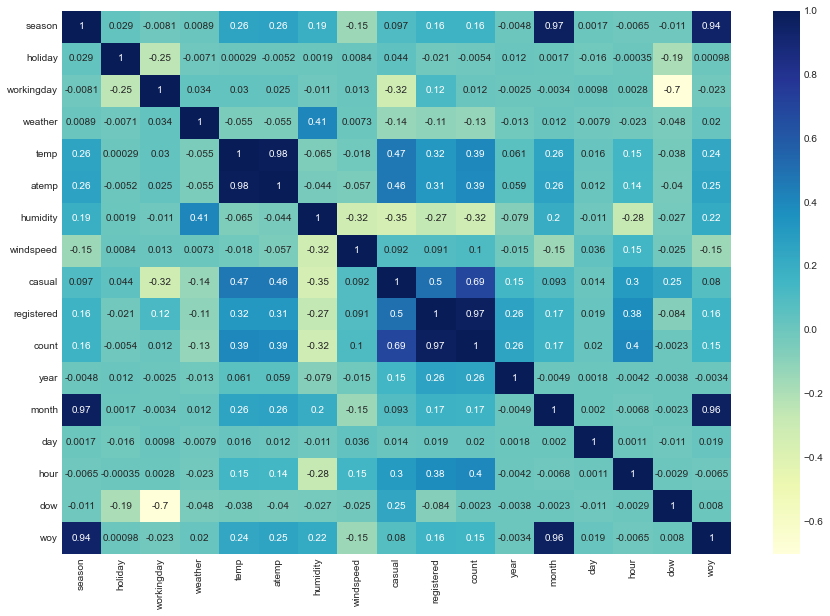

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df_corr.corr(), annot=True, cmap="YlGnBu")

In [18]:
all_df.loc[all_df['windspeed'] <= 5, 'windspeed_category'] = 0
all_df.loc[(all_df['windspeed'] > 5) & (all_df['windspeed'] <= 10), 'windspeed_category'] = 1
all_df.loc[(all_df['windspeed'] > 10) & (all_df['windspeed'] <= 15), 'windspeed_category'] = 2
all_df.loc[(all_df['windspeed'] > 15) & (all_df['windspeed'] <= 20), 'windspeed_category'] = 3
all_df.loc[(all_df['windspeed'] > 20) & (all_df['windspeed'] <= 25), 'windspeed_category'] = 4
all_df.loc[(all_df['windspeed'] > 25) & (all_df['windspeed'] <= 30), 'windspeed_category'] = 5
all_df.loc[(all_df['windspeed'] > 30) & (all_df['windspeed'] <= 35), 'windspeed_category'] = 6
all_df.loc[(all_df['windspeed'] > 35) & (all_df['windspeed'] <= 40), 'windspeed_category'] = 7
all_df.loc[(all_df['windspeed'] > 35) & (all_df['windspeed'] <= 40), 'windspeed_category'] = 8
all_df.loc[(all_df['windspeed'] > 40) & (all_df['windspeed'] <= 45), 'windspeed_category'] = 9
all_df.loc[(all_df['windspeed'] > 45) & (all_df['windspeed'] <= 50), 'windspeed_category'] = 10
all_df.loc[all_df['windspeed'] > 50, 'windspeed_category'] = 11

In [20]:
train_df = all_df[:10886]
test_df = all_df[10886:]

In [21]:
df = train_df.groupby(['windspeed_category']).sum().reset_index()

fig = go.Figure()
fig.add_trace(
    go.Bar(x=df['windspeed_category'], y=df['count'], text=df['count'], textposition='auto', texttemplate='%{text:.0f}' )
)
fig.update_layout({
        "title": { "text": "<b>windspeed VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "template":'ggplot2'
})
fig.show()

In [22]:
all_df.loc[all_df['temp'] <= 5, 'temp_category'] = 0
all_df.loc[(all_df['temp'] > 5) & (all_df['temp'] <= 10), 'temp_category'] = 1
all_df.loc[(all_df['temp'] > 10) & (all_df['temp'] <= 15), 'temp_category'] = 2
all_df.loc[(all_df['temp'] > 15) & (all_df['temp'] <= 20), 'temp_category'] = 3
all_df.loc[(all_df['temp'] > 20) & (all_df['temp'] <= 25), 'temp_category'] = 4
all_df.loc[(all_df['temp'] > 25) & (all_df['temp'] <= 30), 'temp_category'] = 5
all_df.loc[(all_df['temp'] > 30) & (all_df['temp'] <= 35), 'temp_category'] = 6
all_df.loc[(all_df['temp'] > 35) & (all_df['temp'] <= 40), 'temp_category'] = 7
all_df.loc[all_df['temp'] > 40, 'temp_category'] = 8

train_df = all_df[:10886]
test_df = all_df[10886:]

In [23]:
df = train_df.groupby(['temp_category']).sum().reset_index()

fig = go.Figure()
fig.add_trace(
    go.Bar(x=df['temp_category'], y=df['count'], text=df['count'], textposition='auto', texttemplate='%{text:.0f}' )
)
fig.update_layout({
        "title": { "text": "<b>temp VS count </b>" },
        "xaxis": { "showticklabels":True, "dtick": "1" },
        "template":'ggplot2'
})
fig.show()

## Feature Engineering

In [24]:
# peaktime 가중치 함수
def peaktime_func(df):
    if df['workingday'] == 1:
        if (df['hour'] == 8) or (df['hour'] == 17) or (df['hour'] == 18):
            return 4    # 가중치
        elif (df['hour'] == 19) or (df['hour'] == 16) or (df['hour'] == 7):
            return 3
    else:
        if (df['hour'] >= 12 and df['hour'] <= 16):
            return 2
        elif (df['hour'] >= 10 and df['hour'] <= 19):
            return 1
    return 0

all_df['peaktime'] = all_df.apply(peaktime_func, axis=1)

In [25]:
def holiday_add(df):
    if (df['month'] == 12) and (df['day'] == 24 or df['day'] == 31):
        return 1
    return df['holiday']

all_df['holiday'] = all_df.apply(holiday_add, axis=1)

In [26]:
def workingday_remove(df):
    if (df['month'] == 12) and (df['day'] == 24 or df['day'] == 31):
        return 0
    return df['workingday']

all_df['workingday'] = all_df.apply(workingday_remove, axis=1)

In [27]:
def fit_add(df):
    if (df['weather'] <= 2 and df['windspeed'] <= 20):
        if (df['temp'] > 15 and df['temp'] <= 35):
            return 1
    return 0

all_df['fit'] = all_df.apply(fit_add, axis=1)

In [28]:
def humid_add(df):
    if df['humidity'] >= 70:
        return 1
    return 0

all_df['humid'] = all_df.apply(humid_add, axis=1)

In [29]:
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,dow,woy,casual_log,registered_log,count_log,windspeed_category,temp_category,peaktime,fit,humid
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,...,5,52,1.386294,2.639057,2.833213,0.0,1.0,0,0,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,...,5,52,2.197225,3.496508,3.713572,0.0,1.0,0,0,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,...,5,52,1.791759,3.332205,3.496508,0.0,1.0,0,0,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,...,5,52,1.386294,2.397895,2.639057,0.0,1.0,0,0,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,...,5,52,0.000000,0.693147,0.693147,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,1,0,2,10.66,12.880,60,11.0014,NaN,...,0,1,NaN,NaN,NaN,2.0,2.0,3,0,0
2012-12-31 20:00:00,2012-12-31 20:00:00,1,1,0,2,10.66,12.880,60,11.0014,NaN,...,0,1,NaN,NaN,NaN,2.0,2.0,0,0,0
2012-12-31 21:00:00,2012-12-31 21:00:00,1,1,0,1,10.66,12.880,60,11.0014,NaN,...,0,1,NaN,NaN,NaN,2.0,2.0,0,0,0


## Model

In [30]:
from sklearn.model_selection import train_test_split
train_df = all_df[:10886]
test_df = all_df[10886:]


ml_cols = [
           'season', 'holiday', 'workingday', 'weather', 'temp',
           'atemp', 'humidity', 'windspeed', 'day', 'month',
           'year', 'hour', 'dow', 'woy', 'peaktime', 'fit', 'humid'
]
X_train, X_test, y_train, y_test = train_test_split(train_df[ml_cols], train_df['count_log'], test_size=0.2,
                                                    shuffle=True, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R2 Score : {0:.4f}".format(r2_score(y_test, preds)))

R2 Score : 0.6375


In [31]:
train_df.to_csv("data/train.csv", mode='w')
test_df.to_csv("data/test.csv", mode='w')